# A teasing teaser

Always wanted to do ML something but only found online **fried air** and/or **useless and overpriced tips**?

<img src="../fig/ml_everywhere.jpg" width="400"> <img src="../fig/sas_ml.jpg" width="400">

# We are offering exacly the same!

After all, if you are here, it means that you probably already have the right background to understand these topic, you may just need some tools to do it.

### But
* In $\texttt{R}$
    * Is for *free*
    * You know it!
    * There is a ton of [online documentation](https://stackoverflow.com/questions/tagged/r+machine-learning?sort=votes&pageSize=15) (just in case)
* We are cool
* And so are these **notebooks**

## And, most importantly...

## YOU CAN REPRODUCE IT  BY YOURSELF!!!

### YES, you don't even need a laptop (literally, you can do everything on your smartphone!)

<img src="../fig/inception.jpeg" width="400">

Ever wondered what how do different ML models behave against different taks?

Then **run** the $\texttt{R}$ scripts here below!

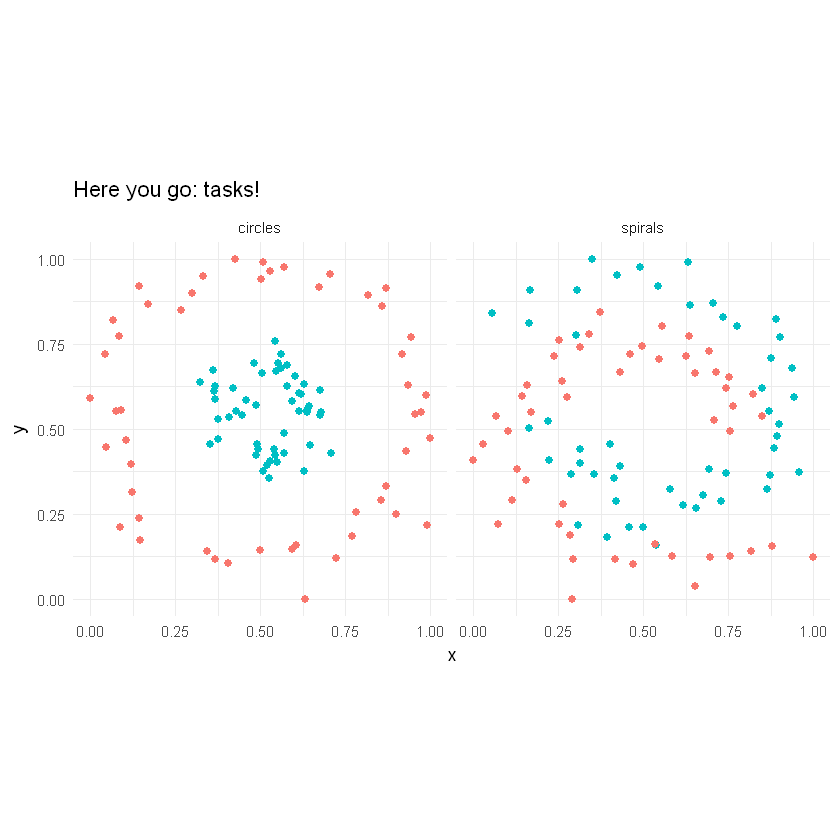

In [8]:
## plot a few datasets

options(warn=-1, error = expression(NULL))
setwd('../../')
source('src/lib.R')

get_full_dataset() %>% filter(type %in% c('circles', 'spirals')) %>%
  ggplot(aes(x = x, y = y, color = class)) +
  geom_point(size = 2) + theme_minimal() +
  ggtitle('Here you go: tasks!') +
  theme(legend.position = "none") +
  facet_wrap(~type) + coord_equal()

We will mostly look at **supervised classification**. The very basic is to classify some observations in a bidimensionnal space. 

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Joining, by = "tmp"


[1] "randomForest"
[1] "circles"
[1] "prob"
[1] "spirals"
[1] "prob"
[1] "radialSvm"
[1] "circles"
[1] "probabilities"
[1] "spirals"
[1] "probabilities"


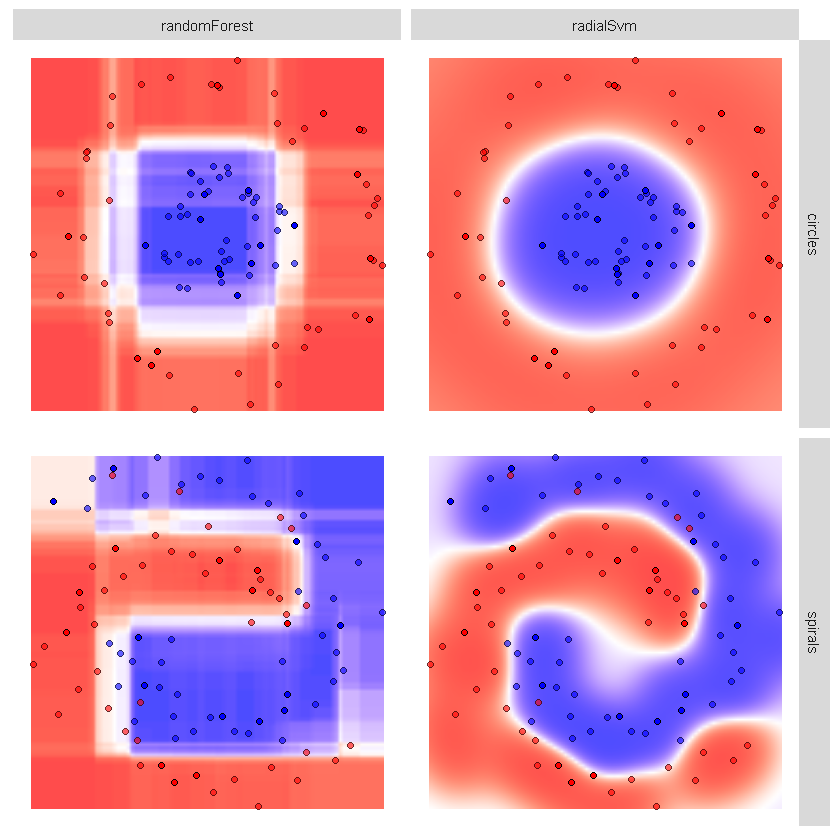

In [6]:
# try this out

methods = list()

methods = list('randomForest' = get_rf_model,
                'radialSvm' = get_radialSvm_model)

# train selected models ####
model = train_models(methods = methods)

# plot trained models ####

data = get_partitioned_df(include_full = F)
data = data[2:3]
plot_models(data, model)

Isn't that cool? **Different models behave differently on the same task!**

Well, you can do *much more*

<img src="../fig/plot_models.png">

Which, btw, it is fairly useless and stop being exciting after a while (because it is actually pointless)

# But...

c'è sempre un però

What if we do some image recognition with nnets?

In [31]:
mnist <- dataset_mnist()

x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

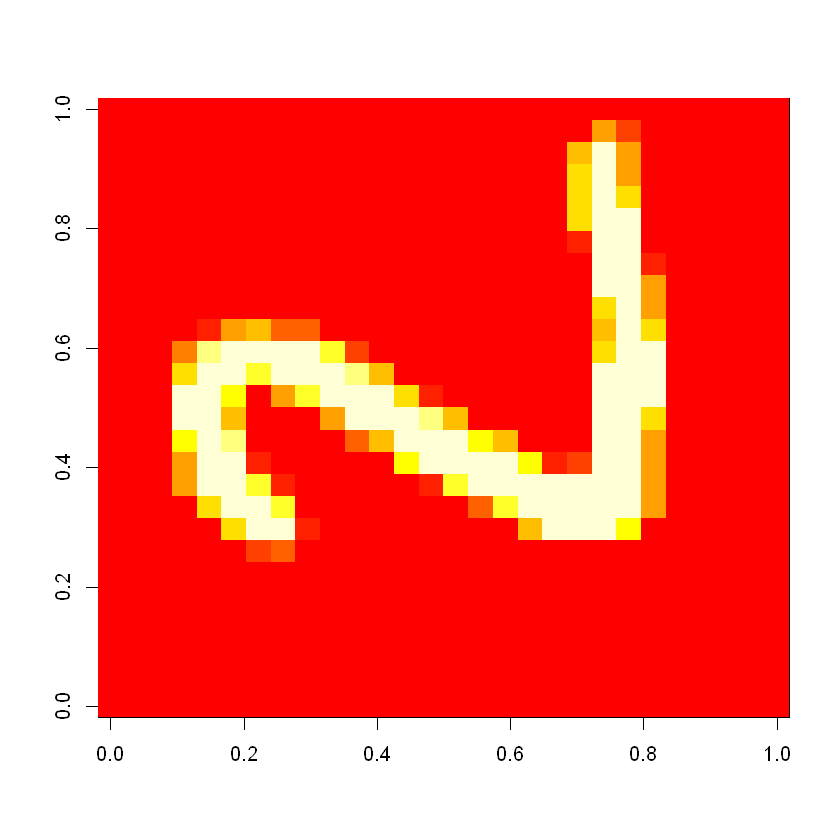

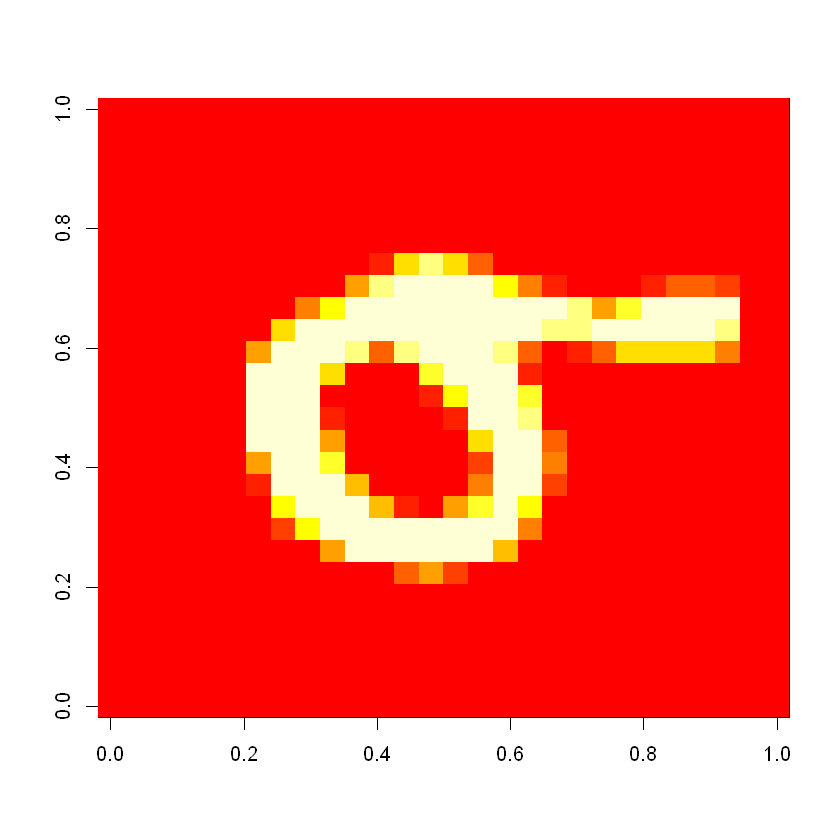

In [33]:
# can you recognize these numbers?

one_pic = x_test[2,,]
another_pic = x_test[100,,]

image(one_pic)
image(another_pic)

In [23]:
# reshape the data
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

# rescale the data
x_train <- x_train / 255
x_test <- x_test / 255

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

# declare the model
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784), name = 'First Layer') %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu', name = 'Second Layer') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax', name = 'Output Layer')

# have a look at the model
summary(model)

# istantiate the tensorflow C++ object
# set some training hyperparameters
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

# train the model
history <- model %>% fit(
  x_train, y_train, 
  epochs = 10, batch_size = 128, 
  validation_split = 0.2
)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_4 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_6 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_____________________________________

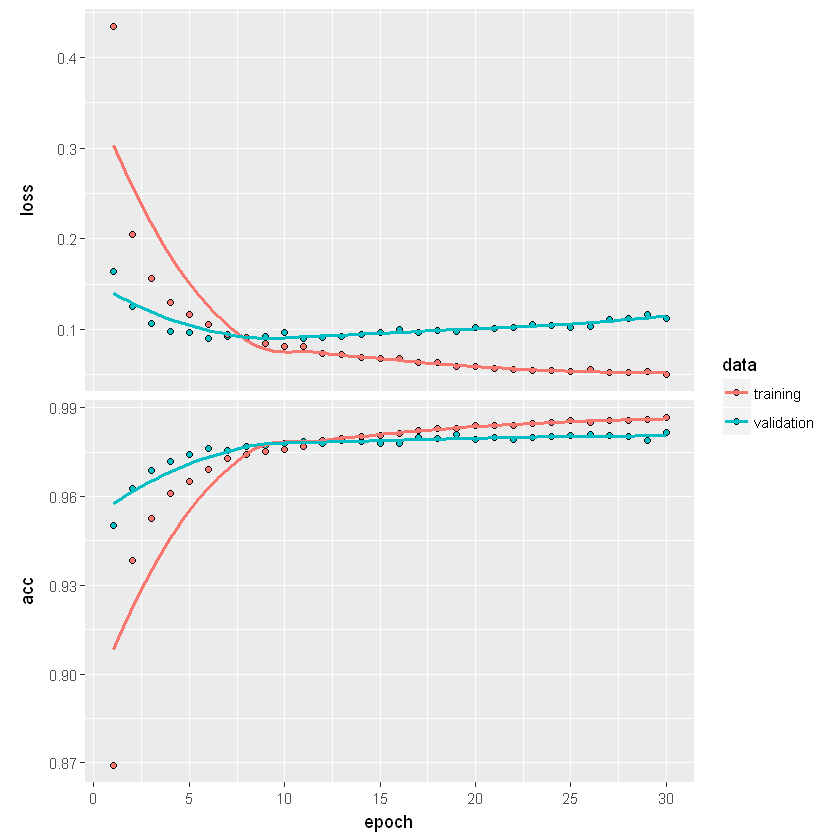

In [24]:
# look at the training history
plot(history)

In [61]:
one_pic = array_reshape(one_pic, c(1, 784))
another_pic = array_reshape(another_pic, c(1, 784))

### Now, will our model be able to reckon the numbers?
Do you remeber the first one? Looked like a two, let's check

In [63]:
model %>% predict_classes(one_pic) %>% paste('This is a ', . , '!')

[1] 2

## Gotcha!

And the other one? Looked like a nine...

In [65]:
model %>% predict_classes(another_pic) %>% paste('... and that one is a ', . ,', of course')

[1] 9

## Yes! 100% correct!

Want to see more of this? Stay tuned!